In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
#Loading dataset
wine = pd.read_csv('winequalityN.csv')

wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


The Red Wine Quality dataset contains information about various physicochemical properties of wines.

This dataset only has numeric variables:

fixed acidity: Influences the flavor of the wine. A significant reduction in acids can lead to wines that taste flat. Examples of fixed acids are tartaric, malic, citric, and succinic, which can be found in grapes (except succinic). It is measured in g/dm3.

volatile acidity: These acids must be distilled out from the wine before the end of the production process. Excess of volatile acids are undesirable and lead to unpleasant flavor. It is measured in g/dm3. citric acid: The amount of citric acid in the wine, which most of it is usually consumed during the fermentation process. It acts as a preservative and small quantities can add freshness and flavor. It is measured in g/dm3.

residual sugar: The amount of sugar remaining after the end of the fermentation. The goal is to have a perfect balance between sweetness and sourness. Wines with more than 45g/dm3 are considered sweet. It is measured in g/dm3.

chlorides: The amount of salt in the wine.

free sulfur dioxide: The amount of sulfur dioxide (SO2) in free form. They are also known as sulfites and too much of it is undesirable and gives a pungent odour. It is measured in g/dm3.

total sulfur dioxide: The total amount of SO2 in the wine. This is added to kill harmful bacteria and preserve quality and freshness. It is measured in mg/dm3.

density: It is used as a measure of the conversion of sugar to alcohol. Sweeter wines have higher density.

pH: Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic).

sulphates: The amount of mineral salts containing sulfur in the wine. It is an additive which can contribute to sulfur dioxide gas (S02) levels and acts as an antimicrobial and antioxidant. They are related to the fermentation process and affect the aroma and flavor of the wine.

alcohol: Alcohol is formed as a result of yeast converting sugar during the fermentation process. It's usually measured in % volume or alcohol by volume (ABV).

quality: A quality label in the range of 0 (very bad) to 10 (very excellent). It is the median of at least three evaluations made by wine experts.

In [2]:
# It prints information about the DataFrame. 
wine.info() 
# It returns description of the data in the DataFrame and T transpose index and columns.
wine.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


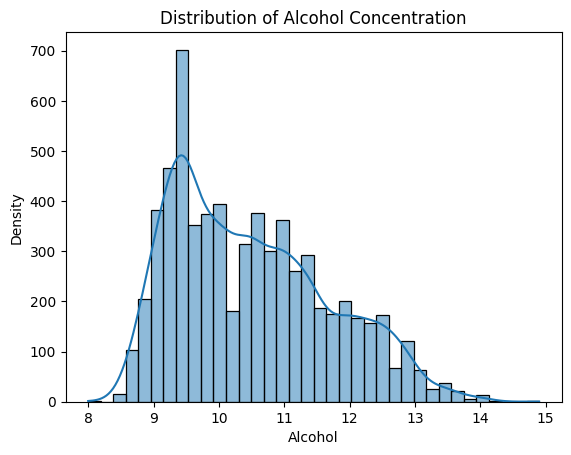

In [3]:
wine.isnull().sum()

# plt.figure(figsize=(15,10))
#`displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
# distplot shows both a histogram (using density normalization) and a superimposed kernel density estimate.
# In contrast, histplot shows a more standard count histogram.
# The default for displot is the same (as it's basically using histplot under the hood), although it uses and returns a FacetGrid rather than an Axes because it is a figure-level function:

ax = sns.histplot(wine['alcohol'],kde= True)

ax.set_title('Distribution of Alcohol Concentration')
ax.set(ylabel='Density', xlabel='Alcohol');

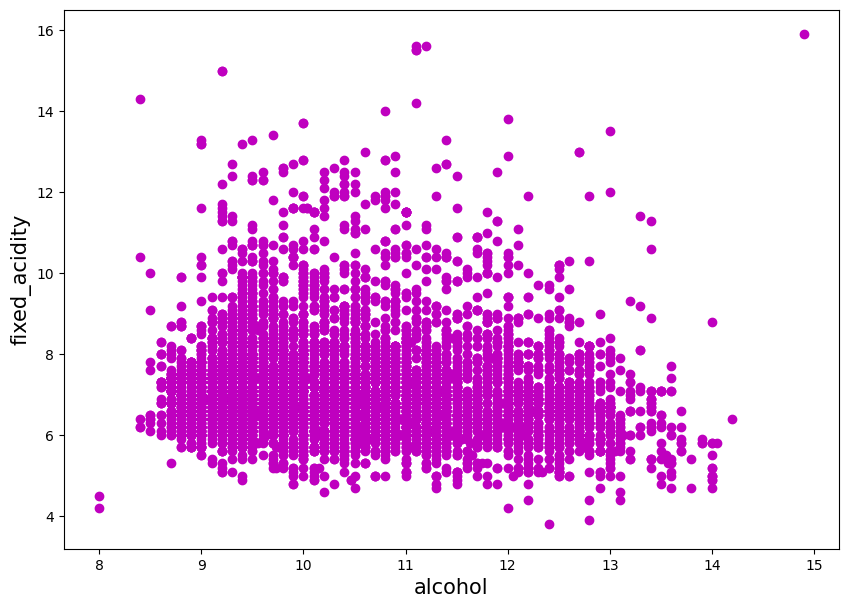

In [4]:
plt.figure(figsize=(10,7))
plt.scatter(x="alcohol",y="fixed acidity",data =wine,marker= 'o',c="m")
plt.xlabel("alcohol",fontsize=15)
plt.ylabel("fixed_acidity",fontsize=15)
plt.show()

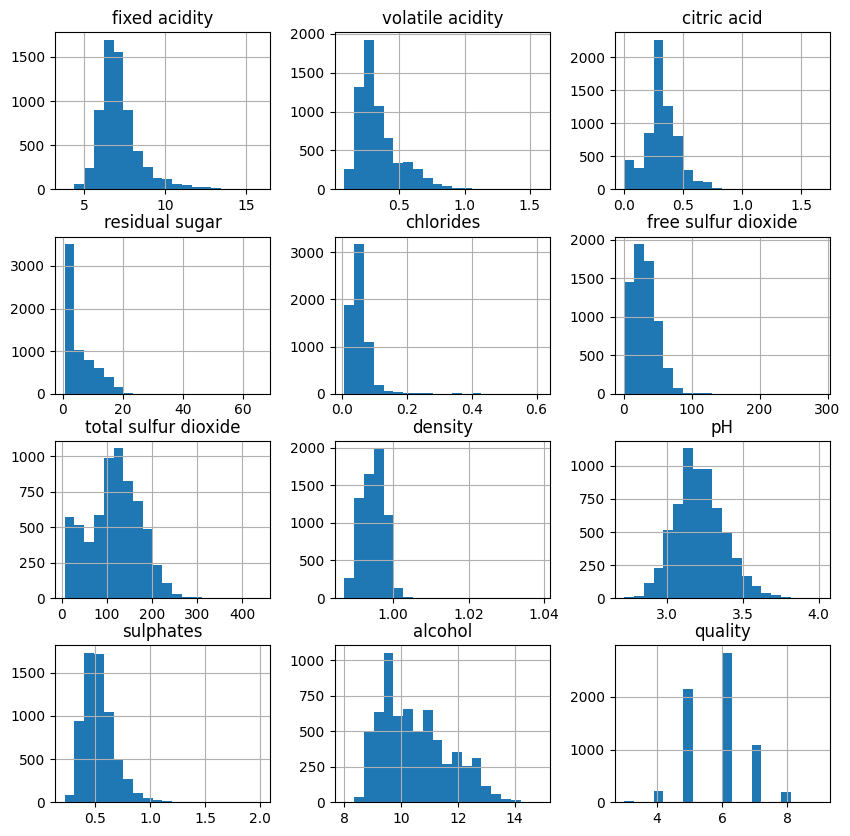

In [5]:
wine.hist(bins=20, figsize=(10, 10))
plt.show()


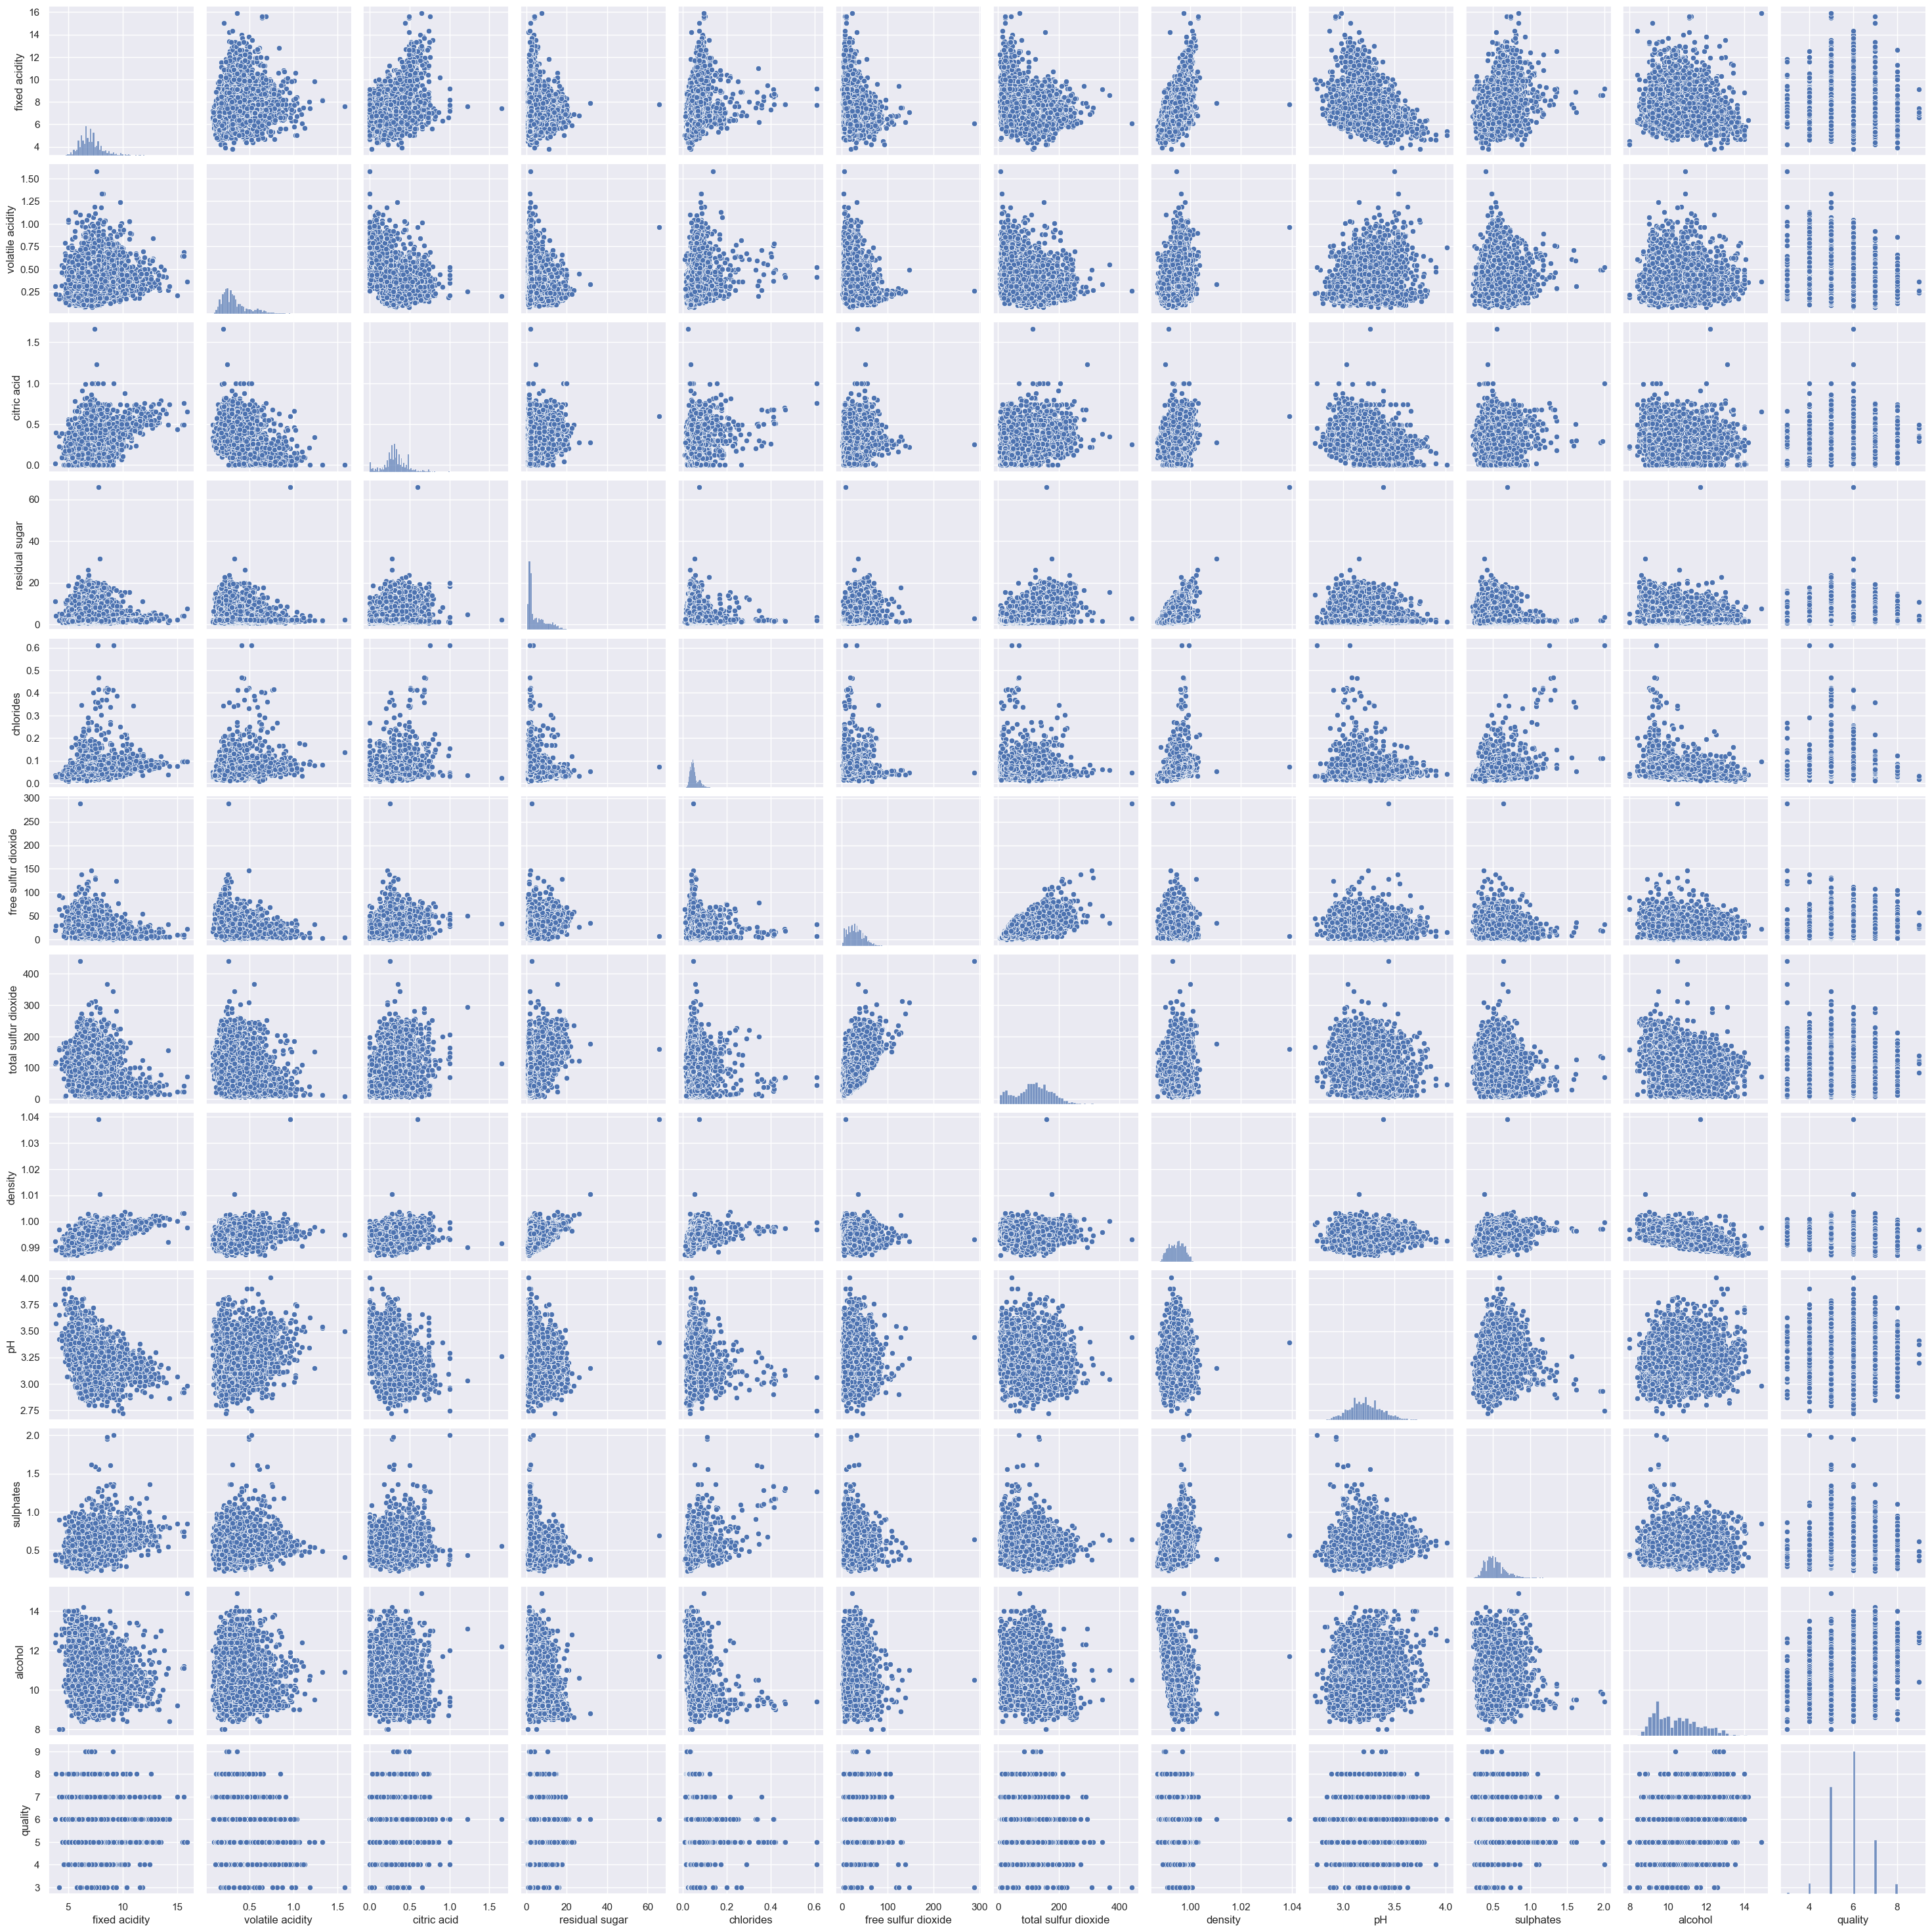

In [6]:
sns.set() #sns. set() will load seaborn's default theme and color palette to the session.
# sns.pairplot(wine,hue='fixed acidity') # It allows us to plot pairwise relationships between variables within a dataset.
sns.pairplot(wine)

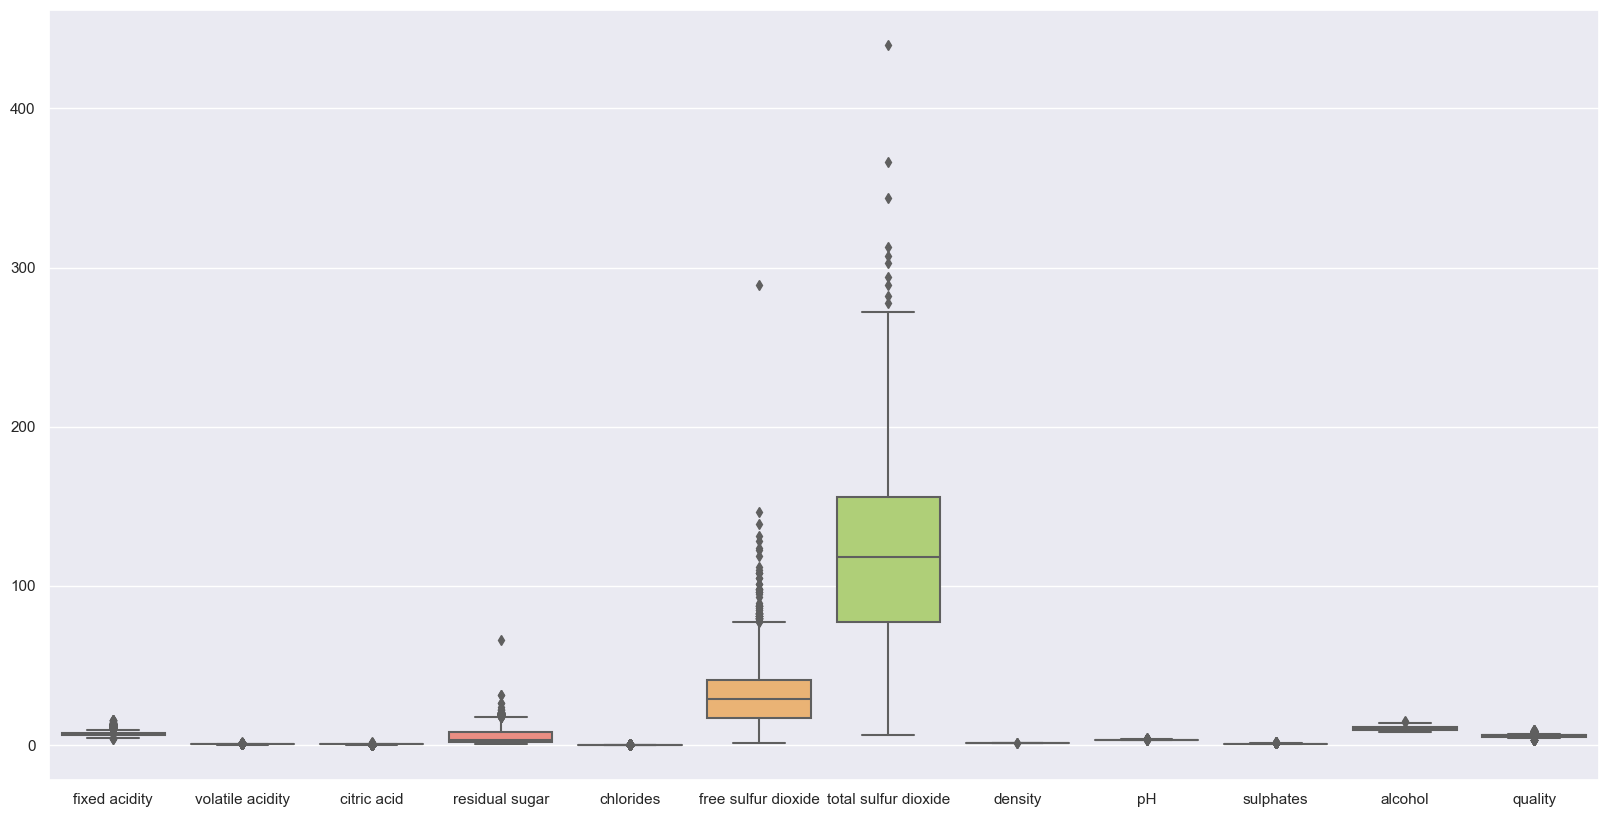

In [7]:
sns.set()
plt.figure(figsize=(20,10))
sns.boxplot(data=wine,palette="Set3")
plt.show()

In [8]:
# #Making binary classificaion for the response variable.
# #Dividing wine as good and bad by giving the limit for the quality
# bins = (2, 6.5, 8)
# group_names = ['bad', 'good']
# wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
# #Now lets assign a labels to our quality variable
# label_quality = LabelEncoder()
# #Bad becomes 0 and good becomes 1 
# wine['quality'] = label_quality.fit_transform(wine['quality'])
# wine['quality'].value_counts()

C:\Users\neera\AppData\Local\Temp\ipykernel_16284\3508402841.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(wine.corr(),annot=True)


<AxesSubplot: >

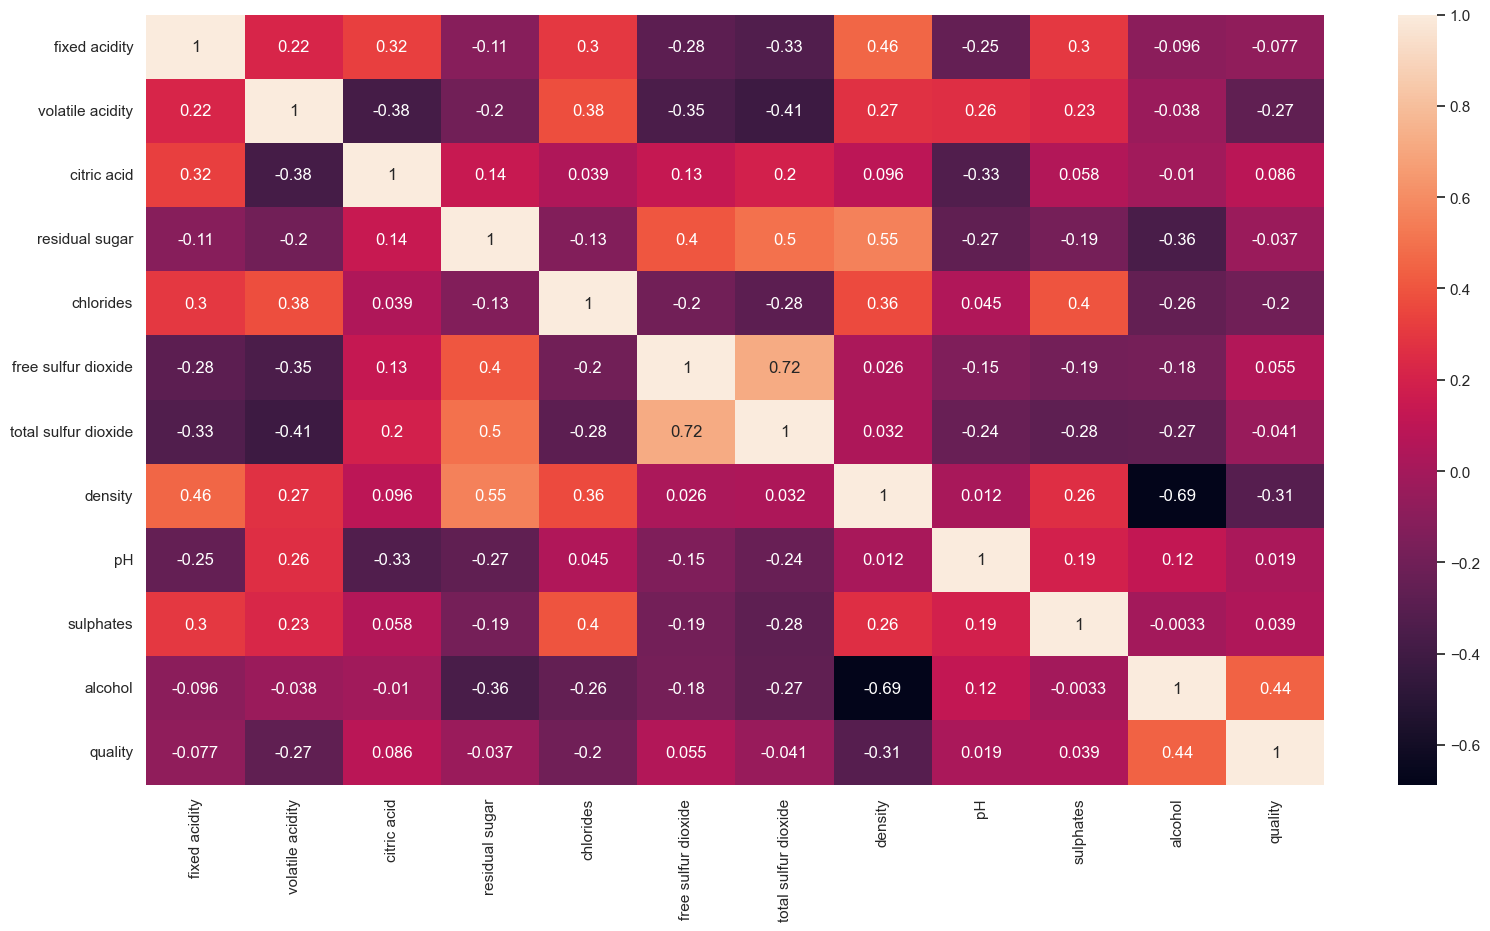

In [9]:
plt.figure(figsize=[19,10])
sns.heatmap(wine.corr(),annot=True)


In [10]:
for a in range(len(wine.corr().columns)):
    for b in range(a):
        if abs(wine.corr().iloc[a,b]) >0.7:
            name = wine.corr().columns[a]
            print(name)

total sulfur dioxide


C:\Users\neera\AppData\Local\Temp\ipykernel_16284\109639429.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  for a in range(len(wine.corr().columns)):
C:\Users\neera\AppData\Local\Temp\ipykernel_16284\109639429.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  if abs(wine.corr().iloc[a,b]) >0.7:
C:\Users\neera\AppData\Local\Temp\ipykernel_16284\109639429.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  name = wine.corr().columns[a]


In [11]:
new_wine=wine.drop('total sulfur dioxide',axis=1)


In [12]:
new_wine.isnull().sum()


type                    0
fixed acidity          10
volatile acidity        8
citric acid             3
residual sugar          2
chlorides               2
free sulfur dioxide     0
density                 0
pH                      9
sulphates               4
alcohol                 0
quality                 0
dtype: int64

In [13]:
new_wine.update(new_wine.fillna(new_wine.mean()))


C:\Users\neera\AppData\Local\Temp\ipykernel_16284\3302833715.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_wine.update(new_wine.fillna(new_wine.mean()))


In [14]:
# catogerical vars 
next_wine = pd.get_dummies(new_wine,drop_first=True)
# display new dataframe
next_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.450000,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.490000,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.440000,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.400000,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.400000,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.580000,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.531215,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.750000,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.710000,10.2,5,0


In [15]:
wine['best quality'] = [ 1 if x>=7 else 0 for x in wine.quality] 
print(wine)

       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  